## Plot Ice Thickness for unlimited and limited sea ice

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")

In [11]:

def load_experiment_zm(expname): #loads the dataset of a simulation
    fname = expname +"_atm_2d_ml.ym.zm.nc" #filename of global yearly mean
    dpath = "/work/bb1092/pp_JH/" +expname +"/" #simulation path
    DS = xr.open_dataset(dpath +fname, decode_times=True) #loading of dataset
    print(dpath +fname)
    return  DS # returns the name of the experiment & the actual dataset

def legend_color(ax, handle_array, pos, fontsize):
    legend = ax.legend(handle_array,handlelength=0, handletextpad=0, edgecolor='none', facecolor='none', markerscale=0, loc=pos, fontsize=fontsize)
    for item in legend.legendHandles:
        item.set_visible(False)
    for text in legend.get_texts():
        if text.get_text()=='Winton':
            text.set_color('C1')
        if text.get_text()=='3L-Winton':
            text.set_color('C1')
        elif text.get_text()=='Semtner':
            text.set_color('C0')
        elif text.get_text()=='0L-Semtner':
            text.set_color('C0')
        elif text.get_text()=='Semtner_5m':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-lim5':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-limited':
            text.set_color('C2')
        elif text.get_text()=='1438ppmv':
            text.set_color('C0')
        elif text.get_text()=='1500ppmv':
            text.set_color('C1')
        elif text.get_text()=='3000ppmv':
            text.set_color('C2')
        elif text.get_text()=='5000ppmv':
            text.set_color('C3')
            
    return legend

In [3]:
nsim=2
exparray=np.empty(nsim, dtype="U100")
simarray=np.empty(nsim, dtype=object)

exparray[0]="mlo_aqua_1500ppmv"
exparray[1]="mlo_aqua_1594ppmv_hice_unlim"

for i in range(0,nsim):
    simarray[i] = load_experiment_zm(exparray[i])
        

/work/bb1092/pp_JH/mlo_aqua_1500ppmv/mlo_aqua_1500ppmv_atm_2d_ml.ym.zm.nc
/work/bb1092/pp_JH/mlo_aqua_1594ppmv_hice_unlim/mlo_aqua_1594ppmv_hice_unlim_atm_2d_ml.ym.zm.nc


In [4]:
sit=np.empty(nsim, dtype=object)
sic=np.empty(nsim, dtype=object)

for i in range(0,nsim):
    sit[i] = simarray[i].sit
    sic[i] = simarray[i].sic

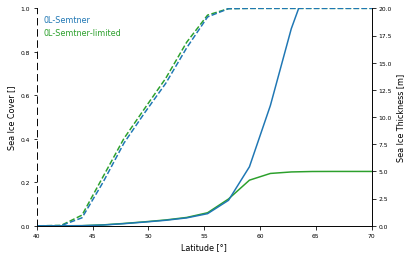

In [21]:
nyears=40
fig, ax = plt.subplots()
#sit[0][-nyears*12:].mean(dim="time").plot(c="C2")
#sit[1][-nyears*12:].mean(dim="time").plot(c="C0")
labelsize=8
ticksize=6

ax.plot(sic[0].lat,sic[0][-nyears:].mean(dim="time"),c="C2",ls="--",label="0L-Semtner")
ax.plot(sic[1].lat,sic[1][-nyears:].mean(dim="time"),c="C0",ls="--",label="0L-Semtner-limited")



plt.xlim(40,70)
plt.ylim(0,1)

ax2 = plt.twinx(ax)



ax2.plot(sit[0].lat,sit[0][-nyears:].mean(dim="time"),c="C2",ls="-")
ax2.plot(sit[1].lat,sit[1][-nyears:].mean(dim="time"),c="C0",ls="-")

#ax2.fill_between(sit[1].lat,np.squeeze(sit[1][-nyears*12:].mean(dim="time").values),0,color="C0", alpha=0.5)
#ax2.fill_between(sit[0].lat,np.squeeze(sit[0][-nyears*12:].mean(dim="time").values),0,color="C2", alpha=0.5)


#ax2.plot(sit[0].lat,np.squeeze(sit[0][-nyears*12:].max(dim="time").values),color="black")
#ax2.plot(sit[1].lat,np.squeeze(sit[1][-nyears*12:].max(dim="time").values),color="black")
#ax2.plot(sit[0].lat,np.squeeze(sit[0][-nyears*12:].min(dim="time").values),color="black")
#ax2.plot(sit[1].lat,np.squeeze(sit[1][-nyears*12:].min(dim="time").values),color="black")

ax2.set_ylim(0,20)

ax2.spines['top'].set_color('none')
ax.spines['top'].set_color('none')

legend_color(ax,['0L-Semtner', '0L-Semtner-limited'],2, labelsize)

ax2.set_ylabel("Sea Ice Thickness [m]", fontsize=labelsize)
ax.set_ylabel("Sea Ice Cover []", fontsize=labelsize)
ax.set_xlabel("Latitude [°]", fontsize=labelsize)
ax.spines['left'].set_linestyle((0,(8,6)))
ax2.spines['left'].set_linestyle((0,(8,6)))
ax.tick_params(labelsize=ticksize) 
ax2.tick_params(labelsize=ticksize) 
plt.savefig("plots/sit_semtner_limit_rev1.pdf")
